In [3]:
import sidechainnet as scn
import numpy as np
from collate import prepare_dataloaders
import torch.nn.functional as F
import torch
from einops import rearrange, repeat
import pandas as pd
from preprocess import trim_dataset, standardize_dataset

In [4]:
bs = 4
data = scn.load(12, thinning=30, batch_size=bs)
data_loaders = prepare_dataloaders(data, True, batch_size=bs)

SidechainNet was loaded from ./sidechainnet_data/sidechainnet_casp12_30.pkl.


In [5]:
data.keys()

dict_keys(['train', 'test', 'date', 'settings', 'valid-10', 'valid-20', 'valid-30', 'valid-40', 'valid-50', 'valid-70', 'valid-90', 'description'])

In [6]:
data['train'].keys()

dict_keys(['seq', 'ang', 'ids', 'evo', 'msk', 'crd', 'sec', 'res', 'ums', 'mod'])

In [7]:
test_dataset = data['test']
test_dataset = trim_dataset(test_dataset)
test_dataset = standardize_dataset(test_dataset)

21it [00:00, 2331.34it/s]


In [41]:
test_loader = prepare_dataloaders(data, True, batch_size=8)

In [42]:
b = next(iter(test_loader['valid-10']))

In [56]:
b.crds.size()

torch.Size([8, 490, 3])

In [57]:
b.msks.size()

torch.Size([8, 35])

In [63]:
crd = b.crds
crd = rearrange(crd, 'b (l s) c -> b l s c', s=14)
crd = crd[:, :, 0:3, :]
crd = rearrange(crd, 'b l s c -> b (l s) c')

In [64]:
crd.size()

torch.Size([8, 105, 3])

In [65]:
msk = b.msks.bool()
msk = repeat(msk, 'b n -> b (n c)', c=3)

In [66]:
msk.size()

torch.Size([8, 105])

In [67]:
crd[msk]

tensor([[ 29.1370,   4.6220,  12.3810],
        [ 28.5680,   5.7280,  13.2040],
        [ 28.8090,   5.5390,  14.7110],
        ...,
        [ 49.3140, 110.0180,  91.7250],
        [ 50.1500, 109.2680,  92.6690],
        [ 49.7680, 107.7920,  92.7420]])

In [75]:
crd[msk].size()

torch.Size([468, 3])

In [68]:
amount = torch.rand(crd.shape[0])

In [69]:
amount

tensor([0.4077, 0.0841, 0.5374, 0.4225, 0.2070, 0.9441, 0.0178, 0.7021])

In [76]:
noise = torch.randn_like(crd)

In [77]:
noise

tensor([[[ 0.6850,  2.2190, -0.5001],
         [ 0.8289,  1.0363,  1.0257],
         [ 1.3800,  0.9954,  1.0994],
         ...,
         [-0.3038, -0.1528, -0.1029],
         [ 1.0884, -0.4470, -0.6866],
         [ 0.6454,  0.1376, -0.2914]],

        [[-0.9984,  1.1483,  1.5618],
         [ 1.6486,  0.4882, -1.3119],
         [-1.0294,  0.3823,  2.0014],
         ...,
         [-1.2160,  1.1562,  0.8189],
         [-0.7646, -1.9820, -0.5085],
         [-2.1026, -0.5129,  1.1461]],

        [[-0.6122, -0.4433, -0.1417],
         [ 0.9440,  0.2192, -2.7538],
         [ 0.4390, -1.7335, -0.7029],
         ...,
         [ 0.9529,  0.2693, -0.1730],
         [ 1.3695, -0.4945,  1.4292],
         [-1.1268,  1.4407,  0.4775]],

        ...,

        [[-0.2449, -0.7791, -0.5880],
         [ 0.0780,  0.6354,  0.6054],
         [ 0.0934,  1.2527,  0.0921],
         ...,
         [-0.1796,  2.2315, -0.2315],
         [-0.9974,  2.3594, -0.2715],
         [-2.0315,  1.9671,  2.0108]],

        [[

In [78]:
noise.size()

torch.Size([8, 105, 3])

In [84]:
amount = amount.view(-1,1,1)

In [90]:
((1 - amount) * crd).size()

torch.Size([8, 105, 3])

In [91]:
(amount * noise).size()

torch.Size([8, 105, 3])

In [93]:
((1 - amount) * crd + amount * noise).size()

torch.Size([8, 105, 3])

In [73]:
crd.size()

torch.Size([8, 105, 3])

In [74]:
torch.randn_like(crd).size()

torch.Size([8, 105, 3])

In [16]:
c = test_dataset['crd'][0]

In [19]:
m = c != 0

In [261]:
len(test_dataset['seq'][-1])

285

In [262]:
train_dataset = trim_dataset(data['train'])

In [166]:
crds = torch.tensor(data['train']['crd'][:2])

In [19]:
F.mse_loss(crds, crds)

tensor(0., dtype=torch.float64)

In [24]:
noise = crds + 0.01 * torch.randn_like(crds)

In [25]:
F.mse_loss(crds, noise)

tensor(9.9447e-05, dtype=torch.float64)

In [29]:
seqs = data['train']['seq'][0]

In [30]:
seqs

'FHCVPRDLSWLDLEANMCLP'

In [36]:
b = next(iter(data_loaders['train']))

In [40]:
torch.argmax(b.seqs, dim=-1)

tensor([[ 5, 15,  6, 10, 15, 13, 15,  4,  5, 14, 17,  9, 16,  7, 17,  6, 15,  2,
          1,  0,  9,  9,  3, 14,  2,  5, 11,  7, 15,  9,  9, 15,  9, 12, 17,  0,
          3, 14, 18,  9, 14, 13,  0, 13,  9, 16, 12,  5,  3,  0, 12, 17,  1,  0,
         13, 12,  9,  9,  7, 12,  9, 14,  9,  8, 17, 15,  0,  3,  3,  8, 15,  0,
          9,  3,  8,  0, 13, 15,  0,  9,  0,  3,  9,  5,  7,  2,  4, 13, 15,  2,
          0, 13,  6, 17, 16,  7, 14,  0, 17, 12,  9, 12,  9, 14, 13, 13, 11,  9,
         13,  7,  9,  7, 12,  3,  9,  7,  5, 19,  9,  0,  8, 13, 15, 17,  4,  3,
         12,  5, 11,  7,  0, 13, 18,  7,  0, 14, 11,  9, 10, 15,  3,  6,  0, 13,
         18, 15, 10,  0, 13,  0,  7, 16,  9,  9,  0,  2, 17,  3, 14,  9,  1, 12,
         13,  9, 17,  8, 16, 12, 12,  5,  5,  9,  9, 13, 15, 17,  2,  9,  6, 12,
          0,  7,  8,  0,  9,  8,  2,  3,  0,  0,  0,  0,  0,  0],
        [10,  5, 11, 14,  9, 15,  8,  7,  0, 16, 14, 16,  5,  2,  2,  5, 16, 16,
          5,  9,  5,  2,  5, 15, 14, 17, 14

In [42]:
b.crds.shape

torch.Size([4, 2716, 3])

In [44]:
new_crds = rearrange(b.crds, 'b (l s) c -> b l s c', s=14)

In [46]:
new_crds.shape

torch.Size([4, 194, 14, 3])

In [47]:
b.seqs.shape

torch.Size([4, 194, 20])

In [49]:
torch.randn_like(crds)


tensor([[-9.6953e-01, -1.8002e+00,  3.3545e-01],
        [ 4.8810e-01, -5.7722e-01, -8.1273e-01],
        [ 8.4589e-01,  1.0866e+00,  2.3226e-01],
        [-1.0384e+00, -6.9814e-01,  1.0918e+00],
        [-1.2904e+00, -9.7244e-01, -4.8392e-01],
        [ 6.5100e-01, -1.3838e-01, -8.0985e-01],
        [ 4.7714e-01,  3.5143e-01, -1.5183e+00],
        [-9.9304e-01, -6.5786e-01,  5.6736e-01],
        [-1.6031e+00, -1.1703e+00,  1.2099e+00],
        [ 3.5173e-01, -1.3192e+00,  7.6492e-01],
        [ 1.3438e+00, -1.1330e+00, -1.1647e+00],
        [ 4.9796e-01,  7.9589e-01, -5.2293e-01],
        [ 2.5971e-01, -1.3565e+00,  4.7725e-01],
        [ 8.5450e-01, -1.3952e+00, -1.0821e+00],
        [-8.8849e-01, -8.3942e-01, -7.5527e-01],
        [-1.5482e-01, -4.2044e-01, -2.1328e+00],
        [ 1.9903e+00, -6.3510e-01, -1.1644e+00],
        [-3.0839e-01, -1.8290e-01,  3.0444e-01],
        [-5.0968e-01,  6.6035e-01,  5.6113e-01],
        [-5.8891e-01,  7.7134e-01, -1.8091e+00],
        [ 1.0607e+00

In [54]:
crds.shape

torch.Size([280, 3])

In [67]:
struct = scn.BatchedStructureBuilder(seq_batch=torch.argmax(b.seqs, dim=-1), crd_batch=b.crds) 

In [68]:
struct

In [71]:
s = struct.build()

In [73]:
s[0].shape

torch.Size([2716, 3])

In [74]:
len(s)

4

In [77]:
struct.to_3Dmol(0)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [78]:
b.crds.shape

torch.Size([4, 2716, 3])

In [83]:
data['train']['crd'][0].shape

(280, 3)

In [84]:
len(data['train']['crd'])

25213

In [89]:
data['train']['crd'][20000].shape

(4620, 3)

In [97]:
pd.DataFrame(data['train']['crd'][20000]).describe()

,0,1,2
count,4620.000000,4620.000000,4620.000000
mean,-21.858939,-6.410510,-1.280270
std,23.234828,10.532692,6.294484
min,-69.325000,-45.087000,-26.488000
25%,-42.982500,-12.815000,-2.551250
50%,-22.156000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,0.000000,12.495000,17.520000


In [101]:
data['train']['crd'][:5].flatten()

AttributeError: 'list' object has no attribute 'flatten'

In [113]:
values = np.concatenate(data['train']['crd'][:10], axis=0).flatten()
pd.DataFrame(values).describe()

,0
count,8400.000000
mean,1.686662
std,9.445719
min,-33.377000
25%,0.000000
50%,0.000000
75%,0.188750
max,68.337000


In [115]:
values = np.concatenate(data['train']['crd'], axis=0).flatten()
pd.DataFrame(values).describe()

,0
count,2.395369e+08
mean,1.375437e+01
std,4.845913e+01
min,-9.392240e+02
25%,0.000000e+00
50%,0.000000e+00
75%,1.901100e+01
max,2.982433e+03


In [116]:
df = pd.DataFrame(values)

In [117]:
df.head()

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [120]:
df = df.replace(0, np.nan)
df = df.dropna(how='all', axis=0)

In [123]:
df.describe()

,0
count,1.223652e+08
mean,2.692498e+01
std,6.513286e+01
min,-9.392240e+02
25%,-1.849000e+00
50%,1.814300e+01
75%,4.354000e+01
max,2.982433e+03


array([[<AxesSubplot: title={'center': '0'}>]], dtype=object)

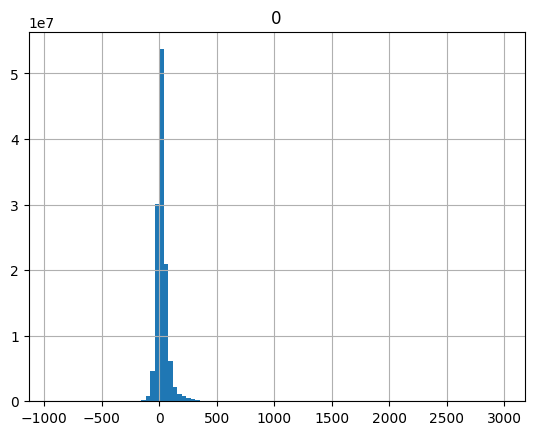

In [126]:
df.hist(bins=100)

In [134]:
max_val = 400
min_val = -200
filtered_df = df[df > min_val][df < max_val].dropna(how='all', axis=0)

In [135]:
filtered_df.describe()

,0
count,1.220219e+08
mean,2.586979e+01
std,5.162392e+01
min,-1.999990e+02
25%,-1.832000e+00
50%,1.810200e+01
75%,4.336900e+01
max,3.999990e+02


array([[<AxesSubplot: title={'center': '0'}>]], dtype=object)

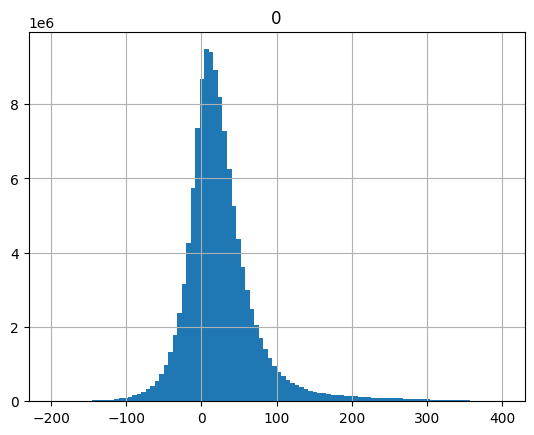

In [136]:
filtered_df.hist(bins=100)

In [167]:
msk = crds > 0
noise = msk * (5 * torch.randn_like(crds) + 25) 

In [169]:
noise[1]

tensor([[ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [24.6093,  0.0000, 31.5187],
        [26.6794,  0.0000, 22.5611],
        [30.6111,  0.0000, 17.8513],
        [31.1641,  0.0000, 20.4047],
        [28.4224,  0.0000, 25.8098],
        [26.4463,  0.0000, 21.3520],
        [23.2031,  0.0000, 17.9194],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
 

In [170]:
amount = 0.01

In [171]:
amount = torch.linspace(0, 1, crds.shape[0])

In [172]:
amount

tensor([0., 1.])

In [173]:
crds.shape[0]

2

In [175]:
amount.view(-1, 1, 1, 1).size()

torch.Size([2, 1, 1, 1])

In [195]:
crds[0]

tensor([[  0.0000,   0.0000,   0.0000],
        [  0.0000,   0.0000,   0.0000],
        [  0.0000,   0.0000,   0.0000],
        [  0.0000,   0.0000,   0.0000],
        [  0.0000,   0.0000,   0.0000],
        [  0.0000,   0.0000,   0.0000],
        [  0.0000,   0.0000,   0.0000],
        [  0.0000,   0.0000,   0.0000],
        [  0.0000,   0.0000,   0.0000],
        [  0.0000,   0.0000,   0.0000],
        [  0.0000,   0.0000,   0.0000],
        [  0.0000,   0.0000,   0.0000],
        [  0.0000,   0.0000,   0.0000],
        [  0.0000,   0.0000,   0.0000],
        [  0.0000,   0.0000,   0.0000],
        [  0.0000,   0.0000,   0.0000],
        [  0.0000,   0.0000,   0.0000],
        [  0.0000,   0.0000,   0.0000],
        [  0.0000,   0.0000,   0.0000],
        [  0.0000,   0.0000,   0.0000],
        [  0.0000,   0.0000,   0.0000],
        [  0.0000,   0.0000,   0.0000],
        [  0.0000,   0.0000,   0.0000],
        [  0.0000,   0.0000,   0.0000],
        [  0.0000,   0.0000,   0.0000],


In [176]:
crds.shape

torch.Size([2, 280, 3])

In [197]:
crds.mean(dim=-2)

tensor([[ 2.3467, 10.8226, -0.6109],
        [ 5.0431, -2.3180,  0.3852]], dtype=torch.float64)

In [208]:
masks = crds != 0

In [213]:
(masks * crds).sum(dim=1) / masks.sum(dim=1)

tensor([[13.9801, 64.4752, -3.6394],
        [11.9667, -5.5004,  0.9142]], dtype=torch.float64)

In [216]:
mask = crds[0] != 0

In [227]:
crd_mean = (mask * crds[0]).sum(dim=0) / mask.sum(dim=0)

In [230]:
crds[0] - mask * crd_mean

tensor([[ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
 

In [224]:
crds[0].size()

torch.Size([280, 3])

In [225]:
crds[0].size(-1)

3

In [231]:
coords_std = torch.sqrt(torch.sum((crds[0] - crd_mean * mask) ** 2, dim=0) / mask.sum(dim=0))

In [232]:
coords_std

tensor([2.9152, 2.0280, 4.4569], dtype=torch.float64)

In [234]:
crd_mean

tensor([13.9801, 64.4752, -3.6394], dtype=torch.float64)

In [235]:
(crds[0] - mask * crd_mean) / coords_std

tensor([[ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
 

In [24]:
np.concatenate([np.zeros((5,5)), np.zeros((5,5))]).shape

(10, 5)

In [25]:
std = [np.array([1,2,3]), np.array([4,5,6])]

In [29]:
np.stack(std).mean(axis=0)

array([2.5, 3.5, 4.5])